## Requirements

In [ ]:
!pip install pandas
!conda install -c conda-forge osmnx

## Fixing the data. 

In [3]:
import numpy as np
import pandas as pd

traffic_counts = pd.read_csv('~/work/data/Traffic_Studies__Vehicle_Volume_Reports__BETA_.csv')
location_data = pd.read_csv('~/work/data/Traffic_Studies__Locations__BETA_.csv')

In [4]:
print(location_data.dtypes)
len(location_data[location_data.SITE_CODE == "D1JDC"])

GLOBALID                            object
DATA_FILE                           object
SITE_CODE                           object
START_DATE                          object
COMMENT_FIELD2                      object
COMMENT_FIELD1                      object
COMMENT_FIELD4                      object
COMMENT_FIELD3                      object
LOCATION                            object
Zip Codes                           object
Single Member Council Districts    float64
dtype: object


8

Extracting the `LOCATION` into floating point values `latitude` and `longitude`.

In [5]:
location_data['latitude'] = location_data['LOCATION'].apply(lambda row: eval(row)[0])
location_data['longitude'] = location_data['LOCATION'].apply(lambda row: eval(row)[1])

location_data = location_data.drop(columns=['LOCATION'])

location_data.head()

print(traffic_counts.dtypes)
traffic_counts.head()

TRAFFIC_STUDY_COUNT_ID    object
ROW_ID                    object
DATA_FILE                 object
SITE_CODE                 object
DATETIME                  object
YEAR                      object
MONTH                      int64
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
TIME                      object
CHANNEL                   object
COUNT_CHANNEL              int64
COUNT_TOTAL                int64
dtype: object


,TRAFFIC_STUDY_COUNT_ID,ROW_ID,DATA_FILE,SITE_CODE,DATETIME,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TIME,CHANNEL,COUNT_CHANNEL,COUNT_TOTAL
0,"88,852",33f341612b199825adff17c5e9681e8bf86be3b0,2ndStE1400BlkWB.rdf,G8JN,04/25/2017 05:15:00 PM,"2,017",4,25,1,17:15,WB,22,22
1,"14,297",c87651b8fc232657f51544c0265bb71edb645f56,McCulloughSt2500BlkBD.rdf,G23RLZ,04/29/2016 12:00:00 PM,"2,016",4,29,4,12:00,EB,1,2
2,"77,384",18adda49b6e3bb477c43b2f3680bded2a7562634,CampMabryDrwy3044SB.rdf,G14CS,10/01/2015 10:15:00 AM,"2,015",10,1,3,10:15,SB,1,1
3,"29,525",98741d8ab066e9feca723bd8720867aa52f5018e,DessauRd10101BlkBD.rdf,D2JMA,03/22/2016 09:30:00 AM,"2,016",3,22,1,09:30,NB,112,162
4,"78,443",2b804108c6c9baab387e9b79c58498bf71e1cb60,CedroTrl5200blkBD.rdf,G20JDC,10/13/2015 01:30:00 PM,"2,015",10,13,1,13:30,EB,24,50


Now we have to extract the date time into a usable format. 

In [6]:
traffic_counts['date_time'] = pd.to_datetime(traffic_counts['DATETIME'])
traffic_counts['time'] = pd.to_datetime(traffic_counts['TIME'])
traffic_counts = traffic_counts.drop(columns=['TIME'])
traffic_counts = traffic_counts.drop(columns=['DATETIME'])

traffic_counts.head()

,TRAFFIC_STUDY_COUNT_ID,ROW_ID,DATA_FILE,SITE_CODE,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CHANNEL,COUNT_CHANNEL,COUNT_TOTAL,date_time,time
0,"88,852",33f341612b199825adff17c5e9681e8bf86be3b0,2ndStE1400BlkWB.rdf,G8JN,"2,017",4,25,1,WB,22,22,2017-04-25 17:15:00,2019-04-29 17:15:00
1,"14,297",c87651b8fc232657f51544c0265bb71edb645f56,McCulloughSt2500BlkBD.rdf,G23RLZ,"2,016",4,29,4,EB,1,2,2016-04-29 12:00:00,2019-04-29 12:00:00
2,"77,384",18adda49b6e3bb477c43b2f3680bded2a7562634,CampMabryDrwy3044SB.rdf,G14CS,"2,015",10,1,3,SB,1,1,2015-10-01 10:15:00,2019-04-29 10:15:00
3,"29,525",98741d8ab066e9feca723bd8720867aa52f5018e,DessauRd10101BlkBD.rdf,D2JMA,"2,016",3,22,1,NB,112,162,2016-03-22 09:30:00,2019-04-29 09:30:00
4,"78,443",2b804108c6c9baab387e9b79c58498bf71e1cb60,CedroTrl5200blkBD.rdf,G20JDC,"2,015",10,13,1,EB,24,50,2015-10-13 13:30:00,2019-04-29 13:30:00


In [7]:
location_data[location_data['SITE_CODE'].isin(['G8JN'])].head()

,GLOBALID,DATA_FILE,SITE_CODE,START_DATE,COMMENT_FIELD2,COMMENT_FIELD1,COMMENT_FIELD4,COMMENT_FIELD3,Zip Codes,Single Member Council Districts,latitude,longitude
25,84b4ff8b-8767-48c7-bb8a-4686a99536bf,RichCreekRd2600BlkBD.rdf,G8JN,10/02/2018 10:00:00 PM,Between Silvercrest Drive & Pinelead Place,2600 Block of RichCreek Road,NaN,Eastbound/Westbound,"3,645",7.0,30.351979,-97.737366
31,986eee60-76ea-4b1c-82c4-c2ef1f9f098d,StakedPlainsBlvd(SofLaurinburgDr).rdf,G8JN,05/24/2018 10:00:00 AM,300' South of Laurinburg Drive,Staked Plains Blvd,NaN,Northbound,"2,862",6.0,30.489268,-97.790549
222,579e852c-0132-4d77-88f8-ad632bf2f8ab,CedarCrestDr9413BD.rdf,G8JN,04/04/2018 11:00:00 PM,140' East of Balcones Way,9413 Cedar Crest Drive,NaN,Eastbound/Westbound,"3,639",6.0,30.442605,-97.798266
244,0a6be220-2d29-4b24-9e17-b95cc606b5b0,MedicalPkwy4200BlkBD.rdf,G8JN,05/01/2017 10:00:00 AM,169' North of W 42nd Street,4200 Block of Medical Parkway,Southbound Count,Northbound/Southbound,"3,644",10.0,30.311318,-97.742574
516,1b7ed24c-5162-47c2-b16c-4da4002a05ca,PayneAve1800BlkBD.rdf,G8JN,05/07/2018 10:00:00 PM,50' East of Hall Street,1800 Block of Payne Street,NaN,Eastbound/Westbound,"3,645",7.0,30.337744,-97.734085


In [8]:
traffic_counts[traffic_counts['SITE_CODE'].isin(['G8JN'])].head()

,TRAFFIC_STUDY_COUNT_ID,ROW_ID,DATA_FILE,SITE_CODE,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CHANNEL,COUNT_CHANNEL,COUNT_TOTAL,date_time,time
0,"88,852",33f341612b199825adff17c5e9681e8bf86be3b0,2ndStE1400BlkWB.rdf,G8JN,"2,017",4,25,1,WB,22,22,2017-04-25 17:15:00,2019-04-29 17:15:00
9,"93,046",07f7ed2e001bafb1ea1e138c11de628fed4af36a,ApplegateDrW600BlkBD.rdf,G8JN,"2,017",4,20,3,WB,7,23,2017-04-20 00:45:00,2019-04-29 00:45:00
126,"111,924",4ef41a5995334fa16ec1c40333a423da77cff6f5,MunsonSt3600BlkBD.rdf,G8JN,"2,017",10,25,2,EB,0,10,2017-10-25 11:30:00,2019-04-29 11:30:00
439,"112,452",10e27e6ca46e9704c7131114ad0682eb32665670,Neches850BlkNB.rdf,G8JN,"2,017",9,26,1,NB,10,10,2017-09-26 17:00:00,2019-04-29 17:00:00
894,"93,052",0c32781ad47c383c2769ba0e3a2dbc2903bc9ad6,ApplegateDrW600BlkBD.rdf,G8JN,"2,017",4,20,3,WB,16,32,2017-04-20 01:30:00,2019-04-29 01:30:00


Trying to determine what the duplicate row entries look like. 

In [9]:
merge = pd.merge(traffic_counts, location_data, how='inner', on=['DATA_FILE'])
print(merge.shape)
print(traffic_counts.shape)
merge[merge['ROW_ID'] == 'f8661d1e33f76d71e6d3a8fb1b619b3426c24bd0'][['ROW_ID', 'DATA_FILE', 'date_time', 'COUNT_TOTAL','latitude', 'longitude' ]]

(84115, 24)
(123870, 13)


,ROW_ID,DATA_FILE,date_time,COUNT_TOTAL,latitude,longitude
4032,f8661d1e33f76d71e6d3a8fb1b619b3426c24bd0,LakewoodDr7200BlkBD.rdf,2016-09-27 17:45:00,57,30.373431,-97.789000
4033,f8661d1e33f76d71e6d3a8fb1b619b3426c24bd0,LakewoodDr7200BlkBD.rdf,2016-09-27 17:45:00,57,30.373417,-97.788997


I think it safe to assume that duplicate columns are identical when looking at the `COUNT_TOTAL`

In [10]:
merge_no_dups = merge.drop_duplicates('ROW_ID')
print(merge_no_dups.shape)
print(merge_no_dups.dtypes)
merge_no_dups['ROW_ID'].is_unique

(80947, 24)
TRAFFIC_STUDY_COUNT_ID                     object
ROW_ID                                     object
DATA_FILE                                  object
SITE_CODE_x                                object
YEAR                                       object
MONTH                                       int64
DAY_OF_MONTH                                int64
DAY_OF_WEEK                                 int64
CHANNEL                                    object
COUNT_CHANNEL                               int64
COUNT_TOTAL                                 int64
date_time                          datetime64[ns]
time                               datetime64[ns]
GLOBALID                                   object
SITE_CODE_y                                object
START_DATE                                 object
COMMENT_FIELD2                             object
COMMENT_FIELD1                             object
COMMENT_FIELD4                             object
COMMENT_FIELD3                        

True

### Traffic Data
Lets look at how the traffic data looks like throughout a day at a single intersection.

(array([737178.   , 737178.125, 737178.25 , 737178.375, 737178.5  ,
        737178.625, 737178.75 , 737178.875, 737179.   ]),
 <a list of 9 Text xticklabel objects>)

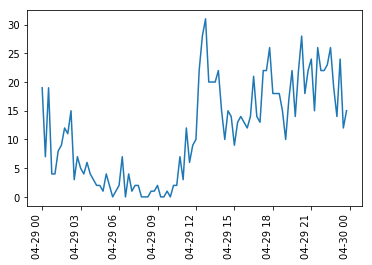

In [65]:
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

secondst_data = merge_no_dups[merge_no_dups['DATA_FILE'] == '2ndStE1400BlkWB.rdf'].sort_values(by='time')



plt.plot(secondst_data['time'], secondst_data['COUNT_TOTAL'])
plt.gcf().autofmt_xdate()
plt.xticks(rotation='vertical')

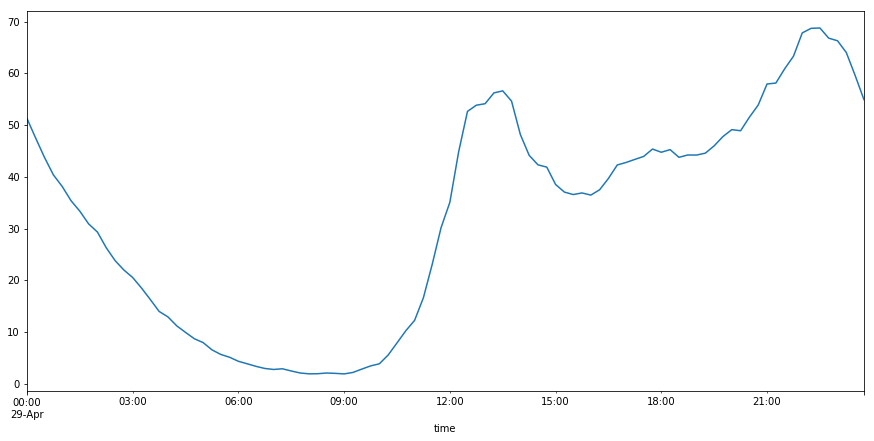

In [42]:
fig, ax = plt.subplots(figsize=(15,7))
merge_no_dups.groupby(['time']).mean()['COUNT_TOTAL'].plot(ax = ax)

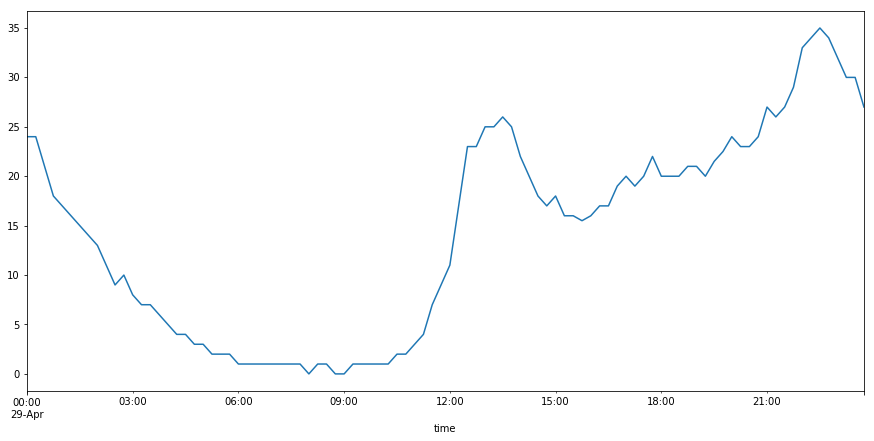

In [45]:
fig, ax = plt.subplots(figsize=(15,7))
merge_no_dups.groupby(['time']).median()['COUNT_TOTAL'].plot(ax = ax)

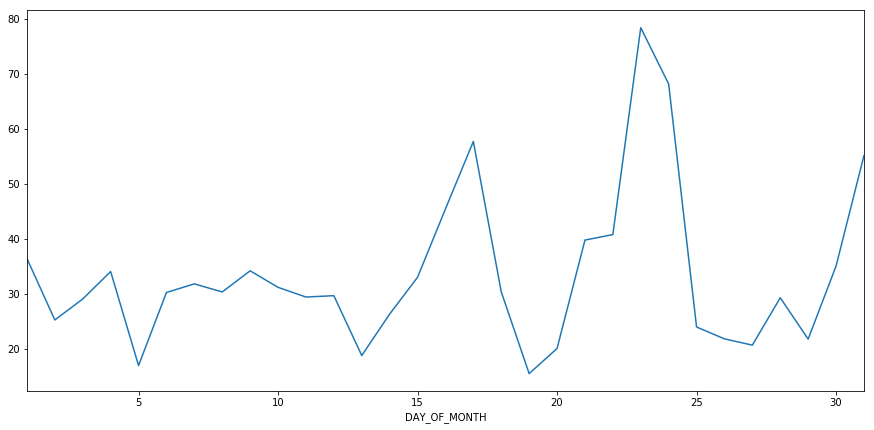

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
merge_no_dups.groupby(['DAY_OF_MONTH']).mean()['COUNT_TOTAL'].plot(ax = ax)

## Maps

In [66]:
import osmnx as ox

location = "2101 Rio Grande Street, Austin, TX 78705"
G = ox.graph_from_address(location, distance=2000)

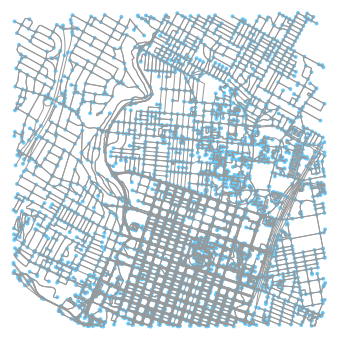

In [72]:
fig, ax = ox.plot_graph(G, show=False, close=False)
data = merge_no_dups.groupby(['DATA_FILE']).mean()
ax.scatter(data['latitude'], data['longitude'], c='red', s=50000)
plt.show()

In [75]:
print(data['latitude'][0], data['longitude'][0])

30.296901516488738 -97.74840777105553


In [87]:
np.unique(zip(merge_no_dups['latitude'], merge_no_dups['longitude'])

array([-97.925949 , -97.908286 , -97.886589 , ...,  30.5010012,
        30.5055139,  30.5095066])

In [109]:
data = merge_no_dups.groupby(['DATA_FILE']).mean()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,COUNT_CHANNEL,COUNT_TOTAL,Single Member Council Districts,latitude,longitude
DATA_FILE,,,,,,,,
13thStW@SanAntonioStEB.rdf,12.000000,8.666667,1.666667,5.145833,5.145833,9.0,30.276326,-97.744849
13thStW@SanAntonioStWB.rdf,12.000000,8.666667,1.666667,1.354167,1.354167,9.0,30.276294,-97.744720
16thStE1805BD.rdf,10.000000,5.583333,2.583333,1.703125,3.406250,1.0,30.276737,-97.721055
16thStW@ColoradoStWB.rdf,9.000000,2.666667,2.666667,4.364583,4.364583,1.0,30.278200,-97.740305
16thStW@CongressAve.rdf,9.000000,2.625000,2.625000,4.666667,4.666667,1.0,30.277830,-97.739034
17thSTW750BlkBD.rdf,9.000000,12.666667,0.666667,1.333333,2.666667,9.0,30.280952,-97.746489
17thStW800BlkBD.rdf,9.000000,12.666667,0.666667,1.770833,3.541667,9.0,30.281019,-97.746720
29thStW500BlkBD.rdf,2.000000,3.875000,2.875000,12.312500,24.625000,9.0,30.295069,-97.742050
2ndStE1000@SanMarcosStWB.rdf,6.000000,15.625000,2.625000,11.354167,11.354167,3.0,30.261475,-97.733980
